# IMDB top 1000 movies - What makes a movie long?
> ### Ishaan Takrani
### 100863042

Most people have seen at least one movie. Millions of movies are watched each year, and movies are nearly a 100 billion dollar industry.
I have always been interested in movies, and the data surrounding them.
How much has this movie grossed? How long is it? What is the genre? who is the director?
These are all questions that I ask myself for nearly every movie I watch. 

Here, I analyze movies, and how different statistics about the movie correlate to it's duration. I am going to discover this, by analyzing and looking for correlation between movie duration and director, IMDb rating, gross, and genre, across the 1000 highest rated (by IMDb) movies.

Using this data, I will be exploring the question: what information about a movie correlates to it's duration?

!["IMDB_logo"](https://m.media-amazon.com/images/G/01/IMDb/brand/guidelines/imdb/IMDb_BrandBanner_1920x425.jpg)

<p style="font-size: 0.5em">IMDb logo, via <a href="https://brand.imdb.com/imdb">[IMDb]</p>


# Methods
## Data collection


The data is from Kaggle, and the [dataset](https://www.kaggle.com/datasets/mayankray/imdb-top-1000-movies-dataset) was contributed by Mayank Ray.
The dataset is a single CSV file with 1000 of the highest rated films on IMDb, and the data contains information about each movie's:
Name, age rating, duration,genre, IMDb Rating, metascore, director, stars (main cast),votes,grossed in $, and plot summary.

We start by importing the pandas seaborn, matplotlib, and numpy libraries. The pandas library will allow for the reading, manipulation, and organization of the data,
The seaborn and matplotlib libraries will allow for the data to be represented visually, and the numpy library will allow for the calculation of a line of best fit for a scatter plot.

In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (20, 5)})
sns.set_theme(palette="pastel", style="darkgrid")   # set size and theme of seaborn plots

In [392]:
movies = pd.read_csv("IMDb_top_1000_movies.csv")    # read csv using pandas

## Cleaning
The category names of the data are unclear. I renamed them to make more sense, which makes analysis easier.
There are also issues with the datatypes of some of the data. The duration of the movies was of the type string, and in order to convert it into integer, which would also make analysis easier, I removed the " min" string before each integer duration, and convert the datatype using the astype() method.
Some movies have multiple genres, but for simplicity, I changed each movie's genre to the most prominent one *(the first in the list)*.

In [393]:
movies.columns = [
    "Name",
    "Rating",
    "Duration (min)",
    "Genre",
    "IMDb",
    "Metascore",
    "Director",
    "Stars",
    "Votes",
    "Gross ($)",
    "Plot",
]
movies = movies.replace({" min": ""}, regex=True)
movies["Genre"] = movies["Genre"].str.split(",").str[0]
movies = movies.astype({"Duration (min)": "int"})
movies = movies.astype({"Gross ($)": "int"})

## Analysis
Using the **head()** method for a pandas DataFrame, we see that we can compare the duration of a movie to the categories such as:
IMDb rating, age rating, director, and gross.

In [394]:
movies.head()

,Name,Rating,Duration (min),Genre,IMDb,Metascore,Director,Stars,Votes,Gross ($),Plot
0,The Shawshank Redemption,R,142,Drama,9.3,82.0,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175,Crime,9.2,100.0,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,Action,9.0,84.0,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2789160,2789160,When the menace known as the Joker wreaks havo...
3,Schindler's List,R,195,Biography,9.0,95.0,Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...",1411332,1411332,"In German-occupied Poland during World War II,..."
4,The Lord of the Rings: The Return of the King,PG-13,201,Action,9.0,94.0,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",1921772,1921772,Gandalf and Aragorn lead the World of Men agai...


### Duration analysis
Let's visualize the Duration data, and see what the range of movie lengths are.

Mean duration: 124.11
Max duration: 321.0
Min duration: 45.0

First quartile: 103.0
Median: 120.0
Third quartile: 138.25


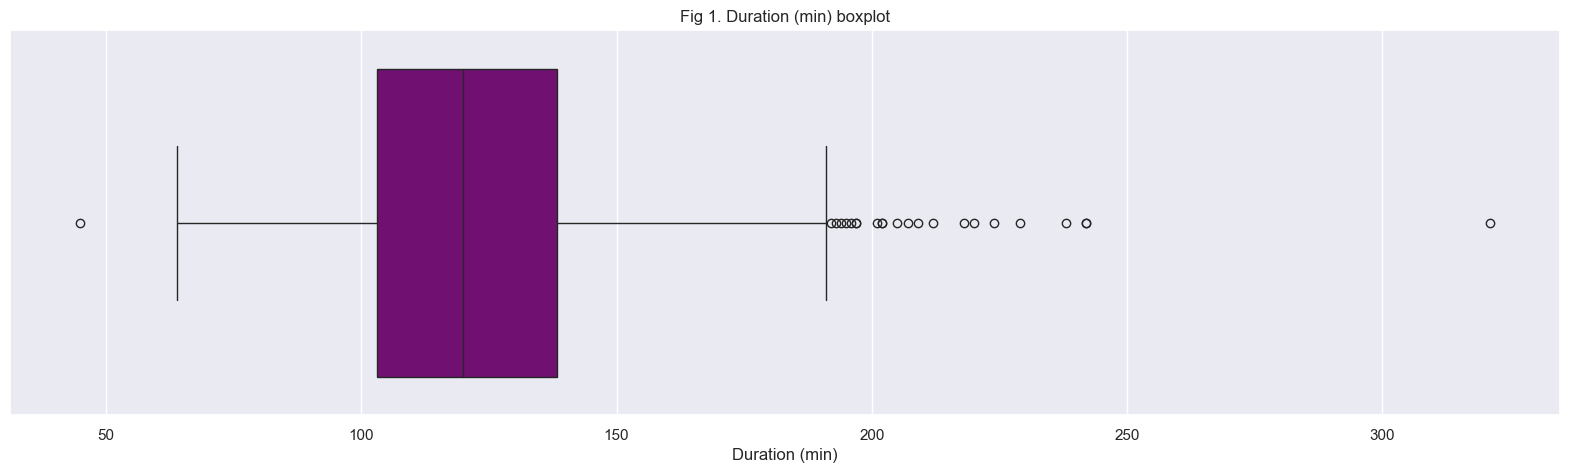

In [417]:
sorted_length = movies.sort_values(by="Duration (min)")
summary = sorted_length["Duration (min)"].describe()
print(f"Mean duration: {round(summary['mean'],2)}")
print(f"Max duration: {round(summary['max'],2)}")
print(f"Min duration: {round(summary['min'],2)}")
print()
print(f"First quartile: {round(summary['25%'],2)}")
print(f"Median: {round(summary['50%'],2)}")
print(f"Third quartile: {round(summary['75%'],2)}")

plot = sns.boxplot(x=movies["Duration (min)"],color="purple").set(title="Fig 1. Duration (min) boxplot")

We can see from this box plot that many movie lengths are between the first and third quartiles, *103* and _138.25_ respectively. There are a few outliers, however. Notably, there is one movie well over 300 minutes long.

### Duration vs IMDb score
We need to group the IMDb ratings of the movies by the duration, then find the mean of the IMDb rating for each movie duration.
By plotting this data in a scatter plot, where each datum is the duration of the movie and it's corresponding mean IMDb score, we can see any correlation.

We can also use numpy to find the slope coefficient of a regression line between the IMDb rating and duration.

,Duration (min),IMDb
0,45,8.2
1,64,7.8
2,66,7.9


,Duration (min),IMDb
139,238,8.2
140,242,7.8
141,321,8.2


'slope of regression line: 0.0020238801303349313'

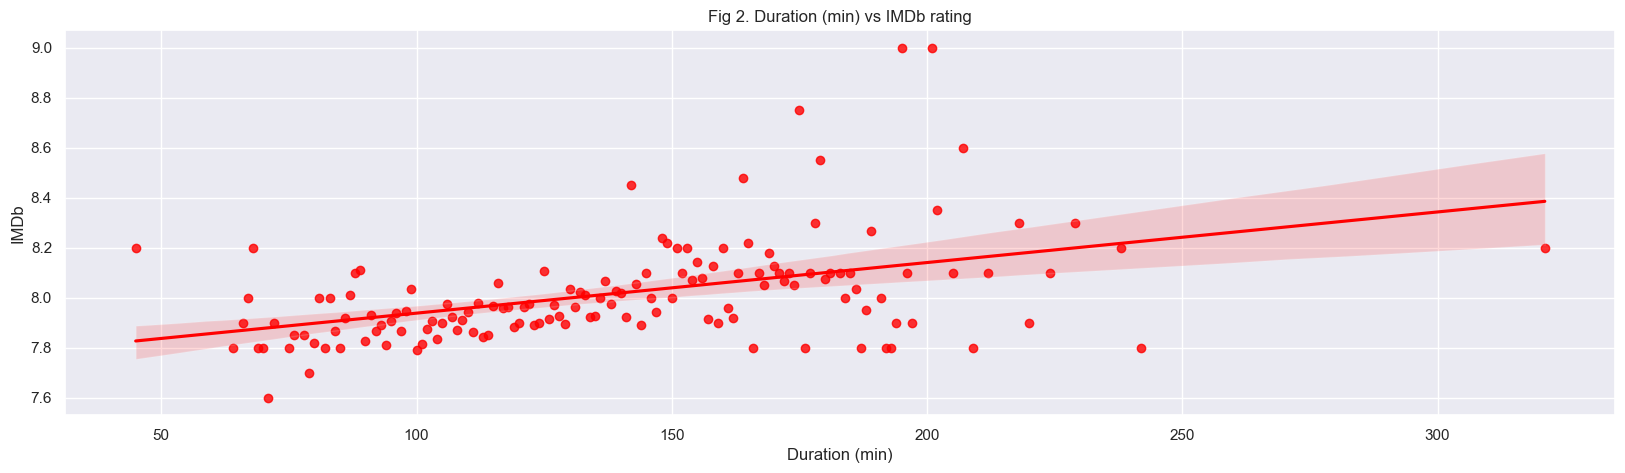

In [396]:
grouped = movies["IMDb"].groupby([movies["Duration (min)"]])
duration_imdb_group = pd.DataFrame(grouped.mean().reset_index())
display(duration_imdb_group.head(3))
display(duration_imdb_group.tail(3))
axes = sns.regplot(
    x=duration_imdb_group["Duration (min)"], y=duration_imdb_group["IMDb"], color="red"
).set(title="Fig 2. Duration (min) vs IMDb rating")

coefficients = np.polyfit(
    duration_imdb_group["Duration (min)"], duration_imdb_group["IMDb"], 1
)
display(f"slope of regression line: {coefficients[0]}")

Looking at the plot and the slope of the regression line (0.00202388), which is positive, we can see that there is a very, very, very weak positive correlation.
This shows that the critical acclaim (IMDb rating) of a movie very loosely correlates to it's duration.

### Duration vs director
We can also see if the director of a movie can influence the length of the movie.
We can do this by grouping the director of each movie with the length of their movies.
We can find the mean duration of each director's movies, then plot this data in a bar plot, then sort these values by the duration.
Once the data is sorted by duration, we can plot both the head and the tail of the data to see which directors have the longest and shortest movies.

,Director,Duration (min)
281,Kenneth Branagh,242.0
41,Anurag Kashyap,232.5
70,Cecil B. DeMille,220.0
44,Ashutosh Gowariker,206.5
398,Philip Kaufman,193.0


,Director,Duration (min)
297,Leo McCarey,69.0
438,Robert Wiene,67.0
461,Sergei Eisenstein,66.0
511,Tod Browning,64.0
62,Buster Keaton,45.0


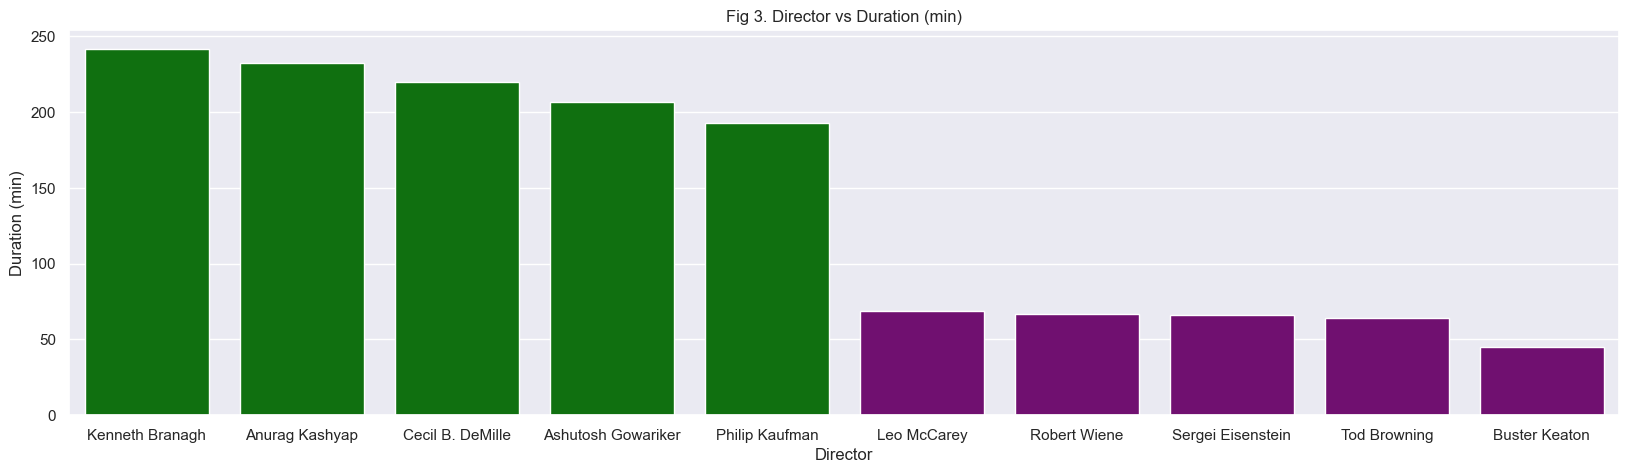

In [426]:
grouped = movies["Duration (min)"].groupby([movies["Director"]])
duration_director_group = pd.DataFrame(grouped.mean().reset_index()).sort_values(
    by="Duration (min)", ascending=False
)
display(duration_director_group.head())
display(duration_director_group.tail())
axes = sns.barplot(
    x=duration_director_group["Director"].head(),
    y=duration_director_group["Duration (min)"].head(),
    color="green",
).set(title="Fig 3. Director vs Duration (min)")

axes = sns.barplot(
    x=duration_director_group["Director"].tail(),
    y=duration_director_group["Duration (min)"].tail(),
    color="purple",
)


From the plots, we can see that the director of a movie plays a large part in how long the movie is, with there being a very large difference between the average movie lengths of directors Kenneth Brangh (avg movie length: 242 min) and Buster Keaton. (avg movie length: 45 min).

### Duration vs Genre
Let's take a look at how the genre of a movie compares to it's length.
We can do this by grouping the genre of each movie with it's duration, then plotting it.

,Genre,Duration (min)
13,Western,150.000000
3,Biography,137.586207
1,Adventure,135.676923
0,Action,133.182796
5,Crime,125.370370
6,Drama,124.650847
11,Mystery,120.333333
4,Comedy,113.689189
12,Thriller,108.000000
10,Horror,101.538462


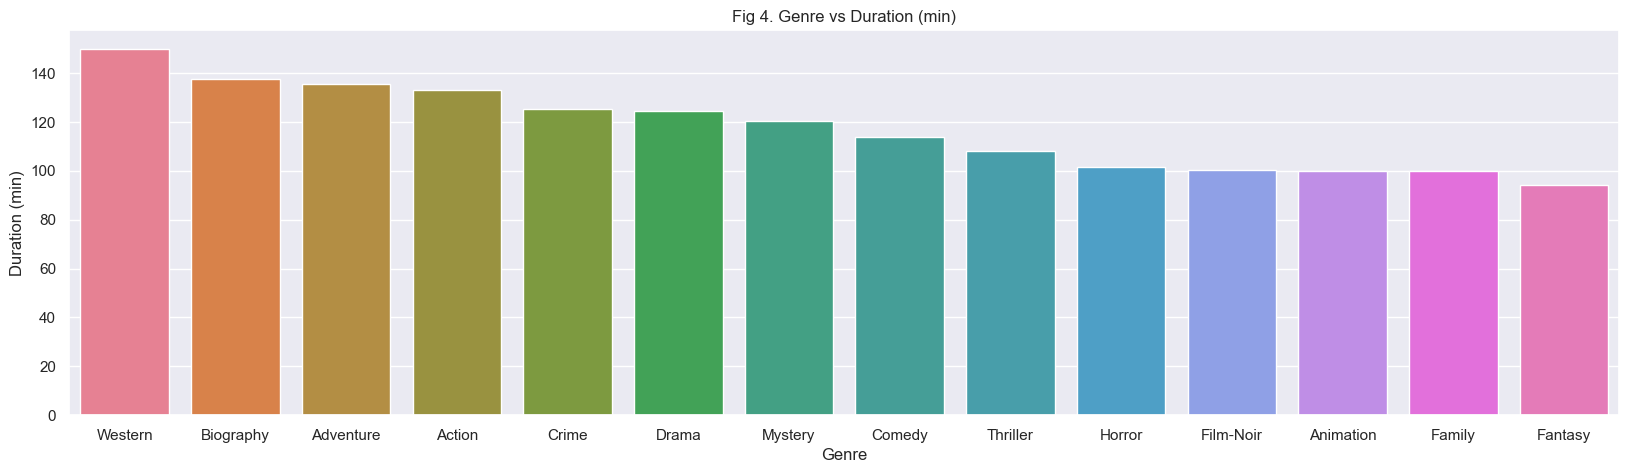

In [427]:
grouped = movies["Duration (min)"].groupby([movies["Genre"]])
duration_genre_group = pd.DataFrame(grouped.mean().reset_index()).sort_values(
    by="Duration (min)", ascending=False
)
display(duration_genre_group)
axes = sns.barplot(
    x=duration_genre_group["Genre"],
    y=duration_genre_group["Duration (min)"],
    hue=duration_genre_group["Genre"]   # purely for aesthetics
).set(title="Fig 4. Genre vs Duration (min)")


When this data is sorted and plotted, we can see that western movies, on average, are the longest (150 mins), while fantasy movies (94 mins) are, on average, the shortest.
From this data, we can see a clear correlation between the length of a movie and it's age rating.

### Duration vs Gross ($)
How does the duration of a movie correlate to how much money the movie makes?

To visualize this, we need not find any means, or group any data. We can simply plot the duration and gross colums on a scatter plot (using matplotlib), and check for correlation.

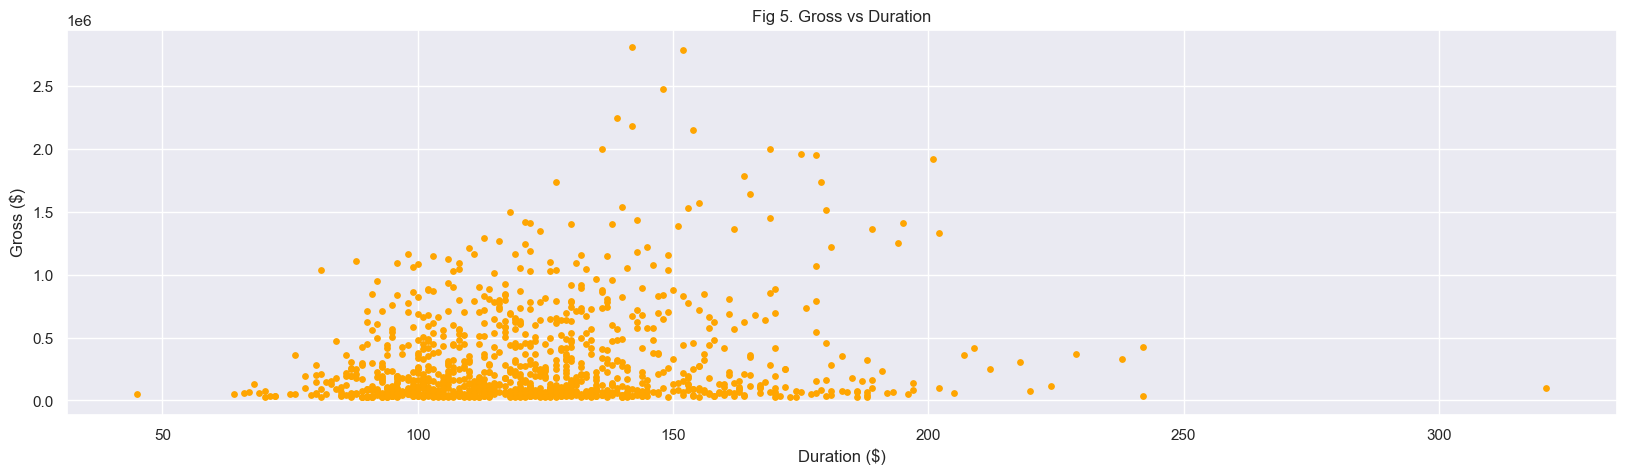

In [414]:
gross = movies["Gross ($)"]
duration = movies["Duration (min)"]

plt.figure(figsize=(20, 5))
plt.scatter(duration, gross, color="orange", s=15)
plt.title("Fig 5. Gross vs Duration")
plt.xlabel("Duration ($)")
plt.ylabel("Gross ($)")
plt.grid(True)
plt.show()

From observing the plot, it is shown that there appears to be dismissable correlation between the duration of a movie and how much money the movie makes.

## Conclusion

I analysed 1000 of the highest rated (by IMDb) movies, and searched for correlation between many attributes of each movie and it's length (Duration (min))

The conclusions that I drew from analysing these movies is that the genre and director of a movie correlate to it's length, the gross of a movie doesn't, and the duration of the movie very slightly does.

This shows that highest grossing movies, at least the top 1000 rated, don't rely on length for popularity, and that the director and genre of a movie do.

This led me to the logical conclusion that some directors prefer to make longer movies. It also led me to the conclusion that movies of different genres tend to be different lengths.

## References

1. Image: https://www.grandviewresearch.com/industry-analysis/movies-entertainment-market#:~:text=The%20global%20movies%20and%20entertainment%20market%20size%20was%20estimated%20at,USD%2095.45%20billion%20in%202022.

2. Data: https://www.kaggle.com/datasets/mayankray/imdb-top-1000-movies-dataset

3. pandas for data reading, cleaning, and accessing

4. seaborn for data visualization

5. matplotlib for data visualization

6. numpy for calculating slope of regression